In [2]:
import numpy as np

import util
from linear_model import LinearModel
from numpy.linalg import inv

In [47]:
class GDA(LinearModel):
    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).

        Returns:
            theta: GDA model parameters.
        """
        # *** START CODE HERE ***
        m, n = x.shape
        # Find phi, mu_0, mu_1, and sigma       
        #PHI
        phi = (y == 1).mean()
        
        #mu_0
        mu_0 = x[y == 0].sum(axis=0) / (y == 0).sum()
        
        #mu_1
        mu_1 = x[y == 1].sum(axis=0) / (y == 1).sum()
        
        #Copy of x to calculate- x - mu
        #x_mu = x.copy()
        x_mu = x[:,:]
        
        #all x with labal 0 is subtracted with mu_0
        x_mu[y == 0] -= mu_0
        
        #all x with labal 0 is subtracted with mu_0
        x_mu[y == 1] -= mu_1
        
        sigma = (1 / m) * x_mu.T.dot(x_mu)
        
        # theta in terms of the parameters   
        sigma_inv = inv(sigma)
        
        #theta
        theta = sigma_inv @ (mu_1 - mu_0)
        
        #theta0
        theta0 = 0.5 * ((mu_0.T @ sigma_inv @ mu_0) - (mu_1.T @ sigma_inv @ mu_1)) - np.log((1 - phi) / phi)
        
        #combine and return 
        theta0 = np.array([theta0])
        self.theta = np.hstack([theta0, theta])
        
        return self.theta
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        
        sigmoid = lambda z: 1 / (1 + np.exp(-z))
        
        #Since Intercept is not added while training
        x = util.add_intercept(x)
        
        #GDA implies logistic 
        prob = sigmoid(x.dot(self.theta))
        
        #prob >= 0.5 mean model is more confindent data
        #came from label y = 1
        preds = (prob >= 0.5).astype(np.int)
        return preds
        # *** END CODE HERE

In [48]:
def train_model(train_path, eval_path, pred_path):
    x_train, y_train = util.load_dataset(train_path, add_intercept=False)

    # *** START CODE HERE ***
    # Train a GDA classifier
    model = GDA()
    model.fit(x_train, y_train)
    # Plot decision boundary on validation set
    x_val, y_val = util.load_dataset(eval_path, add_intercept=False)
    y_pred = model.predict(x_val)
    util.plot(x_val, y_val, model.theta, '{}.png'.format(pred_path))
    
    # Use np.savetxt to save outputs from validation set to pred_path
    np.savetxt(pred_path, y_pred)
    # *** END CODE HERE ***

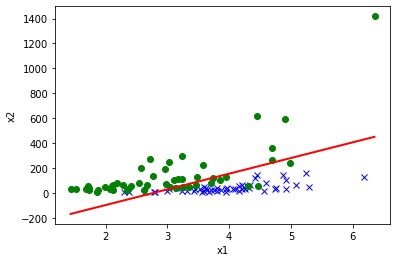

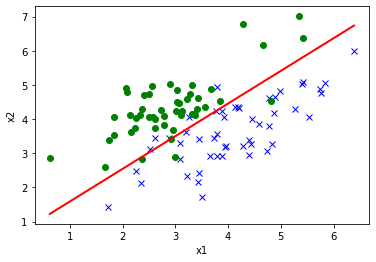

In [49]:
if __name__ == '__main__':
    train_model(train_path='../data/ds1_train.csv',
         eval_path='../data/ds1_valid.csv',
         pred_path='../output/p01e_pred_1.txt')

    train_model(train_path='../data/ds2_train.csv',
         eval_path='../data/ds2_valid.csv',
         pred_path='../output/p01e_pred_2.txt')
